# Machine Learning Model to Safeguard Foragers by Distinguishing Poisonous from Edible Mushrooms

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [217]:
data_1=pd.read_csv('Project_Data.csv')
data_2=pd.read_csv('Project_Data_2.csv')

# 1. Exploratory Data Analysis  of data_1

In [218]:
data_1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [219]:
data_1.tail()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61068,p,1.17,s,s,y,f,f,f,f,3.25,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [220]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [221]:
data_1.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [222]:
print('Shape of the data: ',data_1.shape)
print('Size of the data: ',data_1.size)

Shape of the data:  (61069, 21)
Size of the data:  1282449


In [223]:
sns.pairplot(data=data_1[['class','cap-diameter','stem-height','stem-width']])

# 2. Preprocessing of data_1

In [224]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [225]:
data_1.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

## 2.1 Filling null values in cap-surface column

In [226]:
data_1['cap-surface'].value_counts()

t    8196
s    7608
y    6341
h    4974
g    4724
d    4432
e    2584
k    2303
i    2225
w    2150
l    1412
Name: cap-surface, dtype: int64

### The cap surface of poisonous mushrooms
### 1.sticky-->t
### 2.scaly-->y
### 3.fibrous-->i

### The cap surface of non-poisonous mushrooms
### 1.smooth-->s
### 2.fleshy-->e
### 3.silky-->k

In [227]:
# filling class poisionous(p) with sticky(t),scaly(y),fibrous(i) as it is the majority value in the column.
val=['t','y','i']
missing_indices = data_1[(data_1['class'] == 'p') & (data_1['cap-surface'].isna())].index
data_1.loc[missing_indices, 'cap-surface'] = np.random.choice(val, size=len(missing_indices))

In [228]:
# filling class edible(e) with smooth(s) as it is the 2nd majority value in the column.
val_1=['s','e','k']
missing_indices_1 = data_1[(data_1['class'] == 'e') & (data_1['cap-surface'].isna())].index
data_1.loc[missing_indices_1, 'cap-surface'] = np.random.choice(val_1, size=len(missing_indices_1))
    

## 2.2 Filling null values in gill-attachment column

In [229]:
data_1['gill-attachment'].value_counts()

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64

### since gill-attachment is not important in determining wheather the mushroomis poisonous or edible

In [230]:
# randomly filling the values 
value=['a','d','x','p','e','s','f']
fill_value=np.random.choice(len(value),size=data_1['gill-attachment'].isna().sum())
data_1.loc[data_1['gill-attachment'].isna(),'gill-attachment']=[value[i] for i in fill_value]

## 2.3 Filling null values in gill-spacing column

In [231]:
data_1['gill-spacing'].value_counts()

c    24710
d     7766
f     3530
Name: gill-spacing, dtype: int64

### Gill spacing is one of the characteristics used in the identification of mushrooms, but it is not a definitive factor in determining whether a mushroom is poisonous or edible.

In [232]:
# Many edible mushrooms have close(c) gill-spacing
cond_1=data_1['class']=='e'
data_1.loc[cond_1,'gill-spacing']=data_1.loc[cond_1,'gill-spacing'].fillna(value='c')

In [233]:
# Distant(d) gill-spacing is also found in both edible and poisonous mushrooms. so using distant(d) in rows containing 
# edible(e) in class column.
cond_2=data_1['class']=='p'
data_1.loc[cond_2,'gill-spacing']=data_1.loc[cond_2,'gill-spacing'].fillna(value='d')

## 2.4 Filling null values in stem root column

In [234]:
data_1['stem-root'].value_counts()

s    3177
b    3177
r    1412
f    1059
c     706
Name: stem-root, dtype: int64

In [235]:
#Determining the edibility or toxicity of a mushroom based solely on the type of stem root can be difficult so we have 
## randomely fill the data.
value_1=['s','b','r','f','c','u','z']
fill_value_1=np.random.choice(len(value_1),size=data_1['stem-root'].isna().sum())
data_1.loc[data_1['stem-root'].isna(),'stem-root']=[value_1[i] for i in fill_value_1]

## 2.5 Filling null values in stem-surface column

In [236]:
data_1['stem-surface'].value_counts()

s    6025
y    4940
i    4396
t    2644
g    1765
k    1581
f    1059
h     535
Name: stem-surface, dtype: int64

### Since stem-surface has 38124 null values and its difficult to determine its surface based on cap color or any other featurs it is better to drop the column.

In [237]:
data_1.drop('stem-surface', axis=1,inplace=True)

## 2.6 Filling null values in veil-type column

In [238]:
data_1['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

In [239]:
# since veil-type column has only one value it does not effet the moldel hence we can drop the column.
data_1.drop('veil-type', axis=1,inplace=True)

## 2.7 Filling null values in veil-color column

In [240]:
data_1['veil-color'].value_counts()

w    5474
y     527
n     525
u     353
k     353
e     181
Name: veil-color, dtype: int64

In [241]:
#White or Light-Colored Caps:
#Mushrooms with white or light-colored caps may have a veil that is also white or light in color. This is a common 
#association, but there are exceptions.

#Cream or Yellowish Caps:
#Similarly, mushrooms with cream or yellowish caps may have a veil that reflects those colors.
#Brown or Dark-Colored Caps:

#Some mushrooms with brown or dark-colored caps may have a veil that matches the cap color, while others may have a veil 
#that is lighter in color.

#Red or Rust-Colored Caps:
#For mushrooms with red or rust-colored caps, the veil color might vary. It can be in the same color spectrum or different.

# so let us consider the corresponding cap color as veil color.

n=data_1['cap-color']=='n'
data_1.loc[n,'veil-color']=data_1.loc[n,'veil-color'].fillna(value='n')

b=data_1['cap-color']=='b'
data_1.loc[b,'veil-color']=data_1.loc[b,'veil-color'].fillna(value='b')

g=data_1['cap-color']=='g'
data_1.loc[g,'veil-color']=data_1.loc[g,'veil-color'].fillna(value='g')

r=data_1['cap-color']=='r'
data_1.loc[r,'veil-color']=data_1.loc[r,'veil-color'].fillna(value='r')

p=data_1['cap-color']=='p'
data_1.loc[p,'veil-color']=data_1.loc[p,'veil-color'].fillna(value='p')

u=data_1['cap-color']=='u'
data_1.loc[u,'veil-color']=data_1.loc[u,'veil-color'].fillna(value='u')

e=data_1['cap-color']=='e'
data_1.loc[e,'veil-color']=data_1.loc[e,'veil-color'].fillna(value='e')

w=data_1['cap-color']=='w'
data_1.loc[w,'veil-color']=data_1.loc[w,'veil-color'].fillna(value='w')

y=data_1['cap-color']=='y'
data_1.loc[y,'veil-color']=data_1.loc[y,'veil-color'].fillna(value='y')

l=data_1['cap-color']=='l'
data_1.loc[l,'veil-color']=data_1.loc[l,'veil-color'].fillna(value='l')

o=data_1['cap-color']=='o'
data_1.loc[o,'veil-color']=data_1.loc[o,'veil-color'].fillna(value='o')

k=data_1['cap-color']=='k'
data_1.loc[k,'veil-color']=data_1.loc[k,'veil-color'].fillna(value='k')

## 2.8 Filling null values in ring-type column

In [242]:
data_1['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [243]:
#since the majority value of ring-type is none(f) so we can fill the remaining as f.
data_1['ring-type']=data_1['ring-type'].fillna(value='f')

## 2.9 Filling null values in spore-print-color column

In [244]:
data_1['spore-print-color'].value_counts()

k    2118
p    1259
w    1212
n    1059
g     353
u     182
r     171
Name: spore-print-color, dtype: int64

In [245]:
# the lack of a ring can be helpful in narrowing down your search for the identity of the mushroom, and some groups of 
#mushrooms generally lack rings and have specific spore print colors. Here are some examples:

#Gilled mushrooms without rings:
#Spore print:
#White: Chanterelles, Button mushrooms, Oyster mushrooms
#Cream/Buff: Field mushrooms, Honey mushrooms
#Pink: Blushers, Lactarius species
#Brown: Boletes, Lepistas, Stropharia species
#Black: Ink caps, Coprinus species



value_2=['w','b','p','n','k']
missing_indices_2=data_1[(data_1['ring-type']=='f')|(data_1['spore-print-color'].isna())].index
data_1.loc[missing_indices_2,'spore-print-color']=np.random.choice(value_2,size=len(missing_indices_2))

value_3=['g','r','u','e','y','l','o']
missing_indices_3=data_1[(data_1['ring-type']!='f')|(data_1['spore-print-color'].isna())].index
data_1.loc[missing_indices_3,'spore-print-color']=np.random.choice(value_3,size=len(missing_indices_3))

In [246]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-color            61069 non-null  object 
 14  has-ring              61069 non-null  object 
 15  ring-type          

p    33888
e    27181
Name: class, dtype: int64


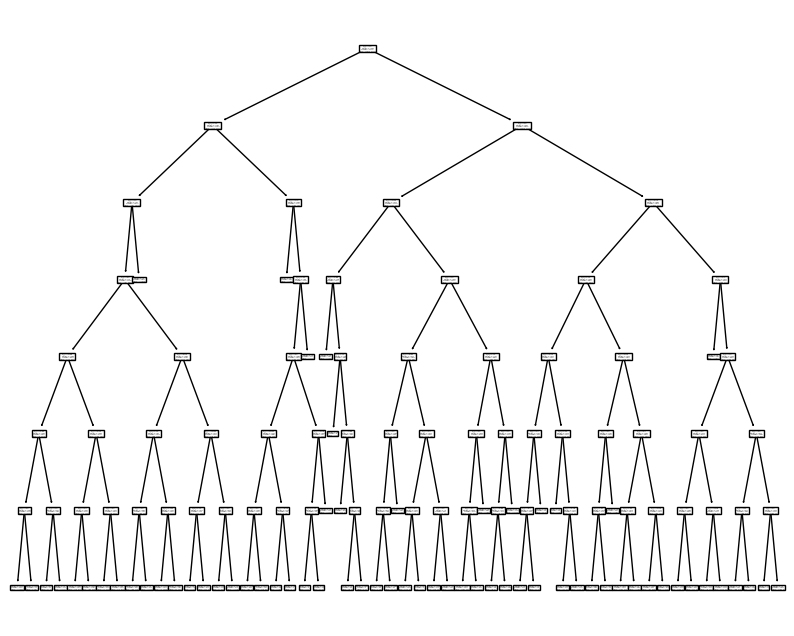

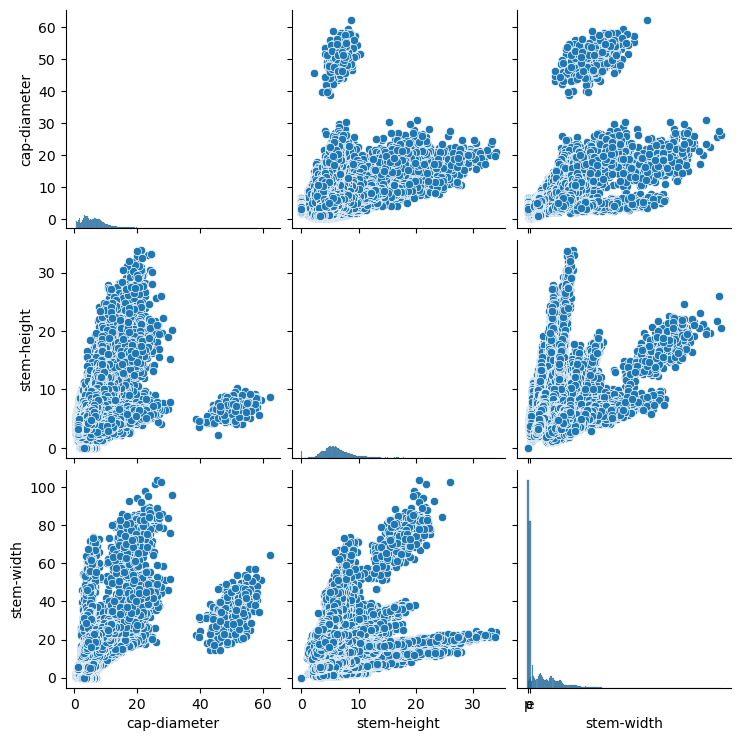

In [247]:
print(data_1['class'].value_counts())
sns.histplot(data_1['class'])
plt.xlabel('poisonous (p) or edible (e)')
plt.ylabel('total count')
plt.show()

# 3. Finding out the outliers

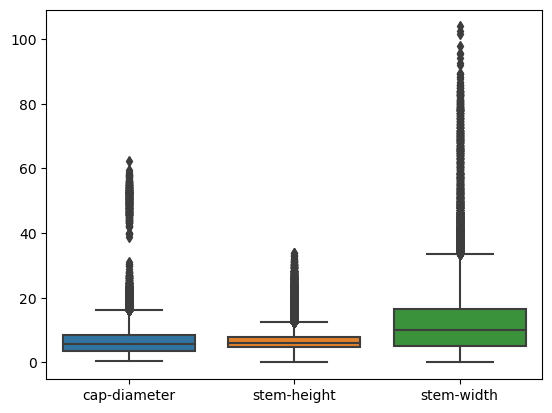

In [248]:
sns.boxplot(data=data_1)
plt.show()

In [249]:
# IQR method
Q1 = data_1.quantile(0.25)
Q3 = data_1.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = ((data_1 < (Q1 - threshold * IQR)) | (data_1 > (Q3 + threshold * IQR))).any(axis=1)


In [250]:
outliers.value_counts()

False    55729
True      5340
dtype: int64

In [251]:
# merging data_1 and outliers



outliers=pd.DataFrame(outliers)
outliers.columns=['outliers']

data_1= pd.concat([data_1, outliers], axis=1)


# removing outliers


data_1=data_1[data_1['outliers']!=True]

# removing the column containing outliers

data_1=data_1.drop('outliers',axis=1)

data_1

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
353,p,6.87,x,g,n,f,e,d,w,6.88,13.64,c,w,w,t,p,u,d,a
354,p,8.59,p,g,n,f,e,d,w,9.15,17.34,s,w,w,t,p,g,d,a
355,p,5.95,p,g,n,f,e,d,w,7.54,12.73,r,w,w,t,p,y,d,u
356,p,6.51,x,g,n,f,e,d,w,6.80,12.92,s,w,w,t,p,y,d,a
357,p,7.66,x,g,n,f,e,d,w,8.55,14.98,c,w,w,t,p,e,d,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,z,y,y,f,f,b,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,f,y,y,f,f,n,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,b,y,y,f,f,b,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,f,y,y,f,f,n,d,u


# 4. Using Category Encoders to convert the object columns to numerical columns

In [252]:
pip install category_encoders

In [253]:
import category_encoders as ce

In [254]:
for i in data_1.columns:
    print(i)

class
cap-diameter
cap-shape
cap-surface
cap-color
does-bruise-or-bleed
gill-attachment
gill-spacing
gill-color
stem-height
stem-width
stem-root
stem-color
veil-color
has-ring
ring-type
spore-print-color
habitat
season


In [255]:
# use ordinal encoder to convert the columns

encoders=ce.OrdinalEncoder(cols=['cap-shape','cap-surface','cap-color','does-bruise-or-bleed','gill-attachment','gill-spacing','gill-color','stem-root','stem-color','veil-color','has-ring','ring-type','spore-print-color','habitat','season'])
data_1=encoders.fit_transform(data_1)


In [256]:
data_1

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
353,p,6.87,1,1,1,1,1,1,1,6.88,13.64,1,1,1,1,1,1,1,1
354,p,8.59,2,1,1,1,1,1,1,9.15,17.34,2,1,1,1,1,2,1,1
355,p,5.95,2,1,1,1,1,1,1,7.54,12.73,3,1,1,1,1,3,1,2
356,p,6.51,1,1,1,1,1,1,1,6.80,12.92,2,1,1,1,1,3,1,1
357,p,7.66,1,1,1,1,1,1,1,8.55,14.98,1,1,1,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,6,6,5,1,3,3,12,3.93,6.22,7,2,2,2,5,10,1,1
61065,p,1.27,3,6,5,1,3,3,12,3.18,5.43,5,2,2,2,5,9,1,1
61066,p,1.27,6,6,5,1,3,3,12,3.86,6.37,4,2,2,2,5,10,1,2
61067,p,1.24,3,6,5,1,3,3,12,3.56,5.44,5,2,2,2,5,9,1,2


# 5. Using Decision Tree model for this classification problem since it is an ensemble method that combines multiple decision trees. It is robust, handles non-linearity well, and provides feature importance.

In [257]:
# import the necessary modules


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [258]:
x=data_1.drop('class',axis=1)
y=data_1['class']

In [259]:
# split the data sets for tarining and testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

# 6. Decision Tree using gini index

In [260]:
gini=DecisionTreeClassifier(criterion='gini', max_depth=7,random_state=101)

In [261]:
# fitting the model using training datas

gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=101)

In [262]:
gini_prediction=gini.predict(x_test)

In [263]:
print('test accuracy scorre: {:.4f}'.format(accuracy_score(y_test,gini_prediction)))

test accuracy scorre: 0.9050


In [264]:
# view the feature scores

feature_scores = pd.Series(gini.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

stem-width              0.203703
cap-surface             0.152557
gill-spacing            0.138195
gill-color              0.095987
gill-attachment         0.071580
stem-height             0.070187
cap-shape               0.054785
stem-color              0.052092
ring-type               0.040083
habitat                 0.036449
season                  0.033201
cap-color               0.026425
spore-print-color       0.012553
veil-color              0.010440
cap-diameter            0.000994
has-ring                0.000770
stem-root               0.000000
does-bruise-or-bleed    0.000000
dtype: float64

## 6.1 Visualizing important features for gini index

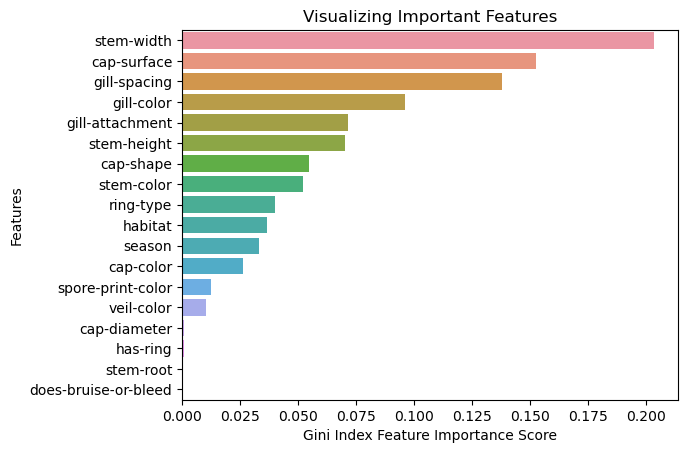

In [265]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Gini Index Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

## 6.2 summarizing the performance of a classification algorithm using confusion matrix for gini index

In [266]:
from sklearn.metrics import confusion_matrix

In [267]:
cm=confusion_matrix(y_test,gini_prediction)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[5236  847]
 [ 476 7374]]


## 6.3 Classification Report for gini index

In [268]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gini_prediction))

              precision    recall  f1-score   support

           e       0.92      0.86      0.89      6083
           p       0.90      0.94      0.92      7850

    accuracy                           0.91     13933
   macro avg       0.91      0.90      0.90     13933
weighted avg       0.91      0.91      0.90     13933



## 6.4 Plot the tree for gini index

In [269]:
from sklearn import tree

plt.figure(figsize=(10,8))
tree.plot_tree(gini.fit(x_train,y_train))

[Text(0.4209558823529412, 0.9375, 'X[6] <= 1.5\ngini = 0.492\nsamples = 41796\nvalue = [18326, 23470]'),
 Text(0.20850840336134455, 0.8125, 'X[17] <= 2.5\ngini = 0.347\nsamples = 14819\nvalue = [3310, 11509]'),
 Text(0.11869747899159663, 0.6875, 'X[2] <= 5.5\ngini = 0.289\nsamples = 13042\nvalue = [2287, 10755]'),
 Text(0.0546218487394958, 0.5625, 'X[16] <= 3.5\ngini = 0.21\nsamples = 8599\nvalue = [1025, 7574]'),
 Text(0.03361344537815126, 0.4375, 'X[2] <= 1.5\ngini = 0.167\nsamples = 7815\nvalue = [721, 7094]'),
 Text(0.01680672268907563, 0.3125, 'X[1] <= 2.5\ngini = 0.38\nsamples = 1582\nvalue = [403, 1179]'),
 Text(0.008403361344537815, 0.1875, 'gini = 0.0\nsamples = 1178\nvalue = [0, 1178]'),
 Text(0.025210084033613446, 0.1875, 'X[9] <= 17.925\ngini = 0.005\nsamples = 404\nvalue = [403, 1]'),
 Text(0.01680672268907563, 0.0625, 'gini = 0.0\nsamples = 403\nvalue = [403, 0]'),
 Text(0.03361344537815126, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05042016806722689, 0.

# 7. Decision Tree using entropy

In [270]:
entropy=DecisionTreeClassifier(criterion='entropy', max_depth=7,random_state=101)

In [271]:
# fitting the model using training datas

entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=101)

In [272]:
entropy_prediction=entropy.predict(x_test)

In [273]:
print('test accuracy scorre: {:.4f}'.format(accuracy_score(y_test,entropy_prediction)))

test accuracy scorre: 0.8887


In [274]:
 #view the feature scores

feature_scores_1 = pd.Series(entropy.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores_1

stem-width              0.220465
cap-surface             0.155824
gill-spacing            0.119411
stem-height             0.090198
gill-color              0.066866
gill-attachment         0.058519
ring-type               0.053528
habitat                 0.048851
cap-shape               0.037204
cap-color               0.036967
stem-color              0.034802
season                  0.031978
does-bruise-or-bleed    0.020475
veil-color              0.011838
cap-diameter            0.011467
has-ring                0.001606
stem-root               0.000000
spore-print-color       0.000000
dtype: float64

## 7.1 Visualizing important features for entropy

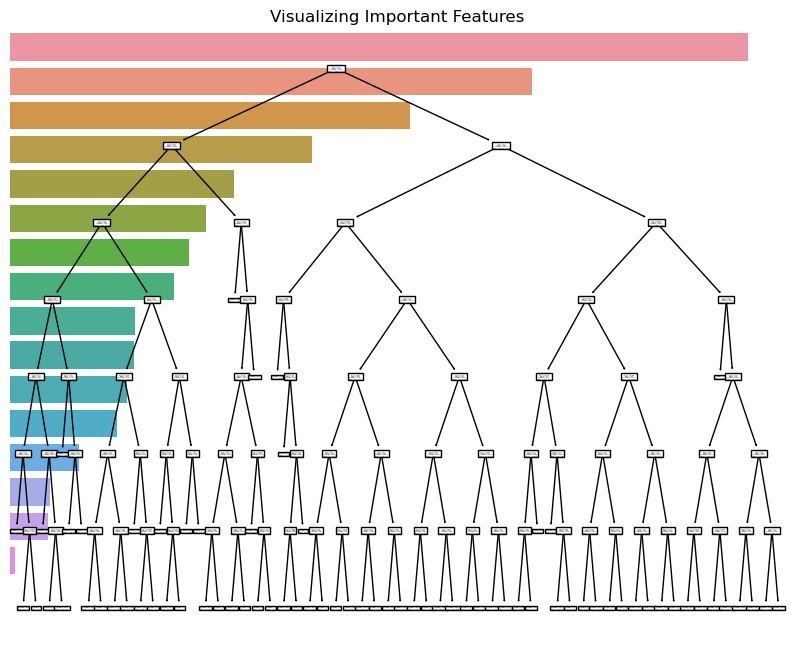

In [275]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores_1, y=feature_scores_1.index)



# Add labels to the graph

plt.xlabel('Entropy Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

## 7.2 summarizing the performance of a classification algorithm using confusion matrix for entropy

In [276]:
cm_1=confusion_matrix(y_test,entropy_prediction)
print('Confusion matrix\n\n', cm_1)


Confusion matrix

 [[4967 1116]
 [ 435 7415]]


## 7.3 Classification Report for entropy index

In [277]:
from sklearn.metrics import classification_report

print(classification_report(y_test, entropy_prediction))

              precision    recall  f1-score   support

           e       0.92      0.82      0.86      6083
           p       0.87      0.94      0.91      7850

    accuracy                           0.89     13933
   macro avg       0.89      0.88      0.89     13933
weighted avg       0.89      0.89      0.89     13933



## 7.4 Plot the tree for entropy

In [278]:
plt.figure(figsize=(10,8))
tree.plot_tree(entropy.fit(x_train,y_train))

[Text(0.38591269841269843, 0.9375, 'X[6] <= 1.5\nentropy = 0.989\nsamples = 41796\nvalue = [18326, 23470]'),
 Text(0.17195767195767195, 0.8125, 'X[17] <= 2.5\nentropy = 0.766\nsamples = 14819\nvalue = [3310, 11509]'),
 Text(0.10582010582010581, 0.6875, 'X[4] <= 1.5\nentropy = 0.67\nsamples = 13042\nvalue = [2287, 10755]'),
 Text(0.09523809523809523, 0.5625, 'X[9] <= 2.515\nentropy = 0.73\nsamples = 11196\nvalue = [2287, 8909]'),
 Text(0.05291005291005291, 0.4375, 'X[2] <= 10.5\nentropy = 0.224\nsamples = 2488\nvalue = [90, 2398]'),
 Text(0.042328042328042326, 0.3125, 'X[0] <= 2.865\nentropy = 0.069\nsamples = 2418\nvalue = [20, 2398]'),
 Text(0.021164021164021163, 0.1875, 'X[1] <= 3.5\nentropy = 0.034\nsamples = 2242\nvalue = [8, 2234]'),
 Text(0.010582010582010581, 0.0625, 'entropy = 0.0\nsamples = 1624\nvalue = [0, 1624]'),
 Text(0.031746031746031744, 0.0625, 'entropy = 0.1\nsamples = 618\nvalue = [8, 610]'),
 Text(0.06349206349206349, 0.1875, 'X[2] <= 1.5\nentropy = 0.359\nsamples =

# 8. Conclusion

In [279]:
from sklearn.metrics import f1_score

## 8.1 F1 score of edible(e) mushrooms.

In [280]:
f1_score_gini=f1_score(y_test,gini_prediction,pos_label = 'e')
f1_score_entropy=f1_score(y_test,entropy_prediction,pos_label = 'e')

print('Gini Index F1 Score: ',f1_score_gini)
print('Entropy F1 Score: ',f1_score_entropy)

Gini Index F1 Score:  0.8878338278931751
Entropy F1 Score:  0.8649542882020026


## 8.2 F1 score of poisonous(p) mushrooms

In [281]:
f1_score_gini=f1_score(y_test,gini_prediction,pos_label = 'p')
f1_score_entropy=f1_score(y_test,entropy_prediction,pos_label = 'p')

print('Gini Index F1 Score: ',f1_score_gini)
print('Entropy F1 Score: ',f1_score_entropy)

Gini Index F1 Score:  0.9176778047414598
Entropy F1 Score:  0.9053171357060008


## 8.3 Decision-Tree Classifier model using both gini index and entropy have only very very small difference in model accuracy and training set accuracy, so there is no sign of overfitting.

# 9. Exploratory Data Analysis  of data_2

In [282]:
data_2.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanita Family,Panther Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amanita Family,False Panther Cap,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amanita Family,The Blusher,e,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amanita Family,Death Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
data_2.tail()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
168,Saddle-Cup Family,White Saddle,p,[2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Bracket Fungi,Elfin's Saddle,p,[2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,Bracket Fungi,Turban Fungus,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Morel Family,Common Morel,e,[3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Jelly Discs Family,Jelly Babies,p,[1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family                173 non-null    object 
 1   name                  173 non-null    object 
 2   class                 173 non-null    object 
 3   cap-diameter          173 non-null    object 
 4   cap-shape             1 non-null      object 
 5   Cap-surface           1 non-null      object 
 6   cap-color             1 non-null      object 
 7   does-bruise-or-bleed  1 non-null      object 
 8   gill-attachment       1 non-null      object 
 9   gill-spacing          0 non-null      float64
 10  gill-color            1 non-null      object 
 11  stem-height           1 non-null      object 
 12  stem-width            0 non-null      float64
 13  stem-root             0 non-null      float64
 14  stem-surface          0 non-null      float64
 15  stem-color            0

In [285]:
data_2['family'].value_counts()

Tricholoma Family         43
Russula Family            27
Bolete Family             14
Ink Cap Family            13
Cortinarius Family        11
Stropharia Family          8
Amanita Family             8
Wax Gill Family            8
Entoloma Family            7
Bracket Fungi              7
Mushroom Family            5
Bolbitius Family           3
Lepiota Family             3
Paxillus Family            3
Chanterelle Family         3
Pluteus Family             2
Oyster Mushroom Family     2
Crepidotus Family          1
Hydnum Family              1
Ear-Pick Family            1
Saddle-Cup Family          1
Morel Family               1
Jelly Discs Family         1
Name: family, dtype: int64

In [286]:
l=[]
for i in data_2['name']:
    l.append(i)
    
print('Name of each species:\n',l)
print('\n\ntotal number of species: ',data_2['name'].value_counts().sum())

Name of each species:
 ['Fly Agaric', 'Panther Cap', 'False Panther Cap', 'The Blusher', 'Death Cap', 'False Death Cap', 'Destroying Angel', 'Tawny Grisette', 'Parasol Mushroom', 'Shaggy Parasol', 'Stinking Parasol', 'Saffron Parasol', 'The Deceiver', 'Amethyst Deceiver', 'Wood Blewit', 'Field Blewit', 'Clouded Agaric', 'Club-footed Funnel Cap', 'Common Funnel Cap', 'Aniseed Funnel Cap', 'Ivory Clitocybe', 'Wood Woolly-foot', 'Russet Tough Shank', 'Clustered Tough Shank', 'Greasy Tough Shank', 'Spotted Tough Shank', 'Fairy Ring Champignon', 'Little Wheel Fungus', 'Horse-hair Fungus', 'Bonnet Bell Cap', 'Stump Bell Cap', 'Tufted Bell Cap', 'Milky Bell Cap', 'Small Bleeding Bell Cap', 'Lilac Bell Cap', 'Yellow-stemmed Bell Cap', 'Orange Bell Cap', 'Orange Moss Agaric', 'Umbrella Navel Cap', 'Rooting Shank', 'Porcelain Mushroom', 'Velvet Shank', 'Honey Fungus', 'Bulbous Honey Fungus', 'Soap-scented Tricholoma', 'Grey Tricholoma', 'Scaly Tricholoma', 'Yellow-brown Tricholoma', 'Sulphur Tri

## 9.1 There are over 14000 species of mushroom but data_2 contains on 173 species.Mejority of data_2 columns is filled with null values, hence it is better to drop the data_2. data_1 alone is necessary for building the model

## Reference: https://www.nps.gov/mora/learn/nature/mushrooms.htm#:~:text=Think%20of%20the%20mushroom%20as,of%20the%20species%20that%20exist.